In [60]:
def known_clean_data(accel_data,gyro_data,num_punches,window,category,user):

    # Initial cleaning of data from raw accel to ID events.
    # Input data as Accel and Gyro data from Mbeint Labs Sensor App
    # Predetermined number of punches (num_punches)
    # Returns timestamp of event (punch) and windowed data at each event
    # for further processing prior to modeling.

    # INPUTS
    # -------------------------------------------------------------------
    # accel_data - pandas df
    # gyro_data - pandas df
    # num_punches - int - prescribed number of punches per this trial
    # window - int - how many data points before and after spike occurs
    # category - str - what category of punch (jab, left hook, etc.)
    # user - who dun it

    # OUTPUT
    # -------------------------------------------------------------------
    # punch_data - json object containing cleaning params and data of punches
    #              params - dict of dict {category, num_punches, window}
    #              data -  list of pandas dataframes containing sensor data with target labels.  

    # drop extraneous columns
    drop_cols = ['epoch (ms)','time (-08:00)']
    accel_data = accel_data.drop(drop_cols,axis=1)
    gyro_data = gyro_data.drop(drop_cols,axis=1)
    gyro_data = gyro_data.drop(['elapsed (s)'],axis=1)
    

    # join into single data set
    combined = accel_data.merge(gyro_data,how="outer", left_index=True, right_index=True)

    # calculate magnitude col to ID top events
    combined["magnitude"] = np.sqrt(combined["X-Axis (g)"]**2+combined["Y-Axis (g)"]**2+combined["Z-Axis (g)"]**2)

    # determine row indicies of num_punches number of events
    event_index = sorted(combined.sort_values(["magnitude"],ascending=False)["elapsed (s)"].head(num_punches).to_dict())

    # magnitude unnecessary once used to ID location of events
    combined = combined.drop(["elapsed (s)","magnitude"],axis=1)
    
    combined['category'] = category

    # find event and store window of data surrounding it
    punch_data = []
    for each in event_index:
        dummy = combined.iloc[each-window:each+window+1]
        punch_data.append(dummy)
    
    data_obj = {}
    data_obj['params'] = {}
    data_obj['params']['category'] = category
    data_obj['params']['num_punches'] = num_punches
    data_obj['params']['window'] = window
    data_obj['params']['fighter'] = user
    data_obj['data'] = punch_data
    
    current_time = datetime.now().strftime("%m.%d.%Y, %H.%M.%S")
    with open('/Users/matthewhwang/Galvanize/fightclub/data/processed/{}/{} {} win{} - {}.p'.format(category,category,num_punches,window,current_time), 'wb') as f:
        pickle.dump(data_obj, f)

    print("Stored {} {} win{} - {} successfully".format(category,num_punches,window,current_time))
    
    
    return data_obj

In [1]:
import os

path = '/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab'

folders = []

# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for folder in d:
        folders.append(os.path.join(r, folder))

for f in folders:
    print(f)

/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 100 Matt Combo RC_2019-11-05T20-19-06.646
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 10 Jack_2019-11-05T16-19-57.817
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 50 Egor Combo RH_2019-11-05T21-06-15.179
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 200 Matt Combo RC_2019-11-09T14-06-59.036
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 25 Egor_2019-11-05T16-24-17.326
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 50 Matt_2019-11-05T14-14-39.859
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 100 Egor Combo RC_2019-11-05T20-25-14.955
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 20 Nathan_2019-11-06T22-02-50.040
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 25 David_2019-11-06T22-21-13.775
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 

In [2]:
import glob

path = 'c:\\projects\\hc2\\'

files = [f for f in glob.glob(path + "**/*.txt", recursive=True)]

for f in files:
    print(f)

In [3]:
files = [f for f in glob.glob(folders[0] + "**/*.csv")]

In [4]:
files

['/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 100 Matt Combo RC_2019-11-05T20-19-06.646/Left Jab 100 Matt Combo RC_Accelerometer_2019-11-05T20-19-06.646.csv',
 '/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 100 Matt Combo RC_2019-11-05T20-19-06.646/Left Jab 100 Matt Combo RC_Gyroscope_2019-11-05T20-19-06.646.csv']

In [5]:
folders[0]

'/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 100 Matt Combo RC_2019-11-05T20-19-06.646'

In [6]:
files[0]

'/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Jab/Left Jab 100 Matt Combo RC_2019-11-05T20-19-06.646/Left Jab 100 Matt Combo RC_Accelerometer_2019-11-05T20-19-06.646.csv'

In [7]:
import pandas as pd

In [8]:
accel = pd.read_csv(files[0])

In [66]:
accel.head()

,epoch (ms),time (-08:00),elapsed (s),X-Axis (g),Y-Axis (g),Z-Axis (g)
0,1573013946727,2019-11-05T20:19:06.727,0.000,-0.781,0.036,0.689
1,1573013946766,2019-11-05T20:19:06.766,0.039,-0.789,0.039,0.695
2,1573013946807,2019-11-05T20:19:06.807,0.080,-0.789,0.044,0.694
3,1573013946847,2019-11-05T20:19:06.847,0.120,-0.784,0.057,0.685
4,1573013946888,2019-11-05T20:19:06.888,0.161,-0.785,0.055,0.692


In [64]:
gyro.head()

,epoch (ms),time (-08:00),elapsed (s),X-Axis (°/s),Y-Axis (°/s),Z-Axis (°/s)
0,1573013946646,2019-11-05T20:19:06.646,0.000,-8.902,11.037,-3.110
1,1573013946686,2019-11-05T20:19:06.686,0.040,-8.720,10.732,-2.988
2,1573013946727,2019-11-05T20:19:06.727,0.081,-7.744,9.268,-3.110
3,1573013946766,2019-11-05T20:19:06.766,0.120,-3.415,7.195,-2.805
4,1573013946807,2019-11-05T20:19:06.807,0.161,0.549,4.634,-2.134


In [10]:
name = files[0].split('/')[-1].split(' ')

In [11]:
name

['Left',
 'Jab',
 '100',
 'Matt',
 'Combo',
 'RC_Accelerometer_2019-11-05T20-19-06.646.csv']

In [12]:
category = name[0] + " " + name[1]

In [13]:
category

'Left Jab'

In [14]:
count = int(name[2])

In [62]:
user = name[3]

In [21]:
accel_data = pd.read_csv(files[0])

In [22]:
gyro_data = pd.read_csv(files[1])

In [23]:
drop_cols = ['epoch (ms)','time (-08:00)']
accel_data = accel_data.drop(drop_cols,axis=1)
gyro_data = gyro_data.drop(drop_cols,axis=1)
gyro_data = gyro_data.drop(['elapsed (s)'],axis=1)

In [25]:
gyro_data

,X-Axis (°/s),Y-Axis (°/s),Z-Axis (°/s)
0,-8.902,11.037,-3.110
1,-8.720,10.732,-2.988
2,-7.744,9.268,-3.110
3,-3.415,7.195,-2.805
4,0.549,4.634,-2.134
5,1.341,1.098,0.549
6,-0.793,-1.890,3.049
7,-1.402,-4.390,4.146
8,0.976,-6.037,4.085
9,4.329,-7.256,3.720


In [26]:
combined = accel_data.merge(gyro_data,how="outer", left_index=True, right_index=True)


In [27]:
combined.head()

,elapsed (s),X-Axis (g),Y-Axis (g),Z-Axis (g),X-Axis (°/s),Y-Axis (°/s),Z-Axis (°/s)
0,0.000,-0.781,0.036,0.689,-8.902,11.037,-3.110
1,0.039,-0.789,0.039,0.695,-8.720,10.732,-2.988
2,0.080,-0.789,0.044,0.694,-7.744,9.268,-3.110
3,0.120,-0.784,0.057,0.685,-3.415,7.195,-2.805
4,0.161,-0.785,0.055,0.692,0.549,4.634,-2.134


In [29]:
import numpy as np

In [30]:
combined["magnitude"] = np.sqrt(combined["X-Axis (g)"]**2+combined["Y-Axis (g)"]**2+combined["Z-Axis (g)"]**2)

In [31]:
combined.head()

,elapsed (s),X-Axis (g),Y-Axis (g),Z-Axis (g),X-Axis (°/s),Y-Axis (°/s),Z-Axis (°/s),magnitude
0,0.000,-0.781,0.036,0.689,-8.902,11.037,-3.110,1.042103
1,0.039,-0.789,0.039,0.695,-8.720,10.732,-2.988,1.052173
2,0.080,-0.789,0.044,0.694,-7.744,9.268,-3.110,1.051710
3,0.120,-0.784,0.057,0.685,-3.415,7.195,-2.805,1.042655
4,0.161,-0.785,0.055,0.692,0.549,4.634,-2.134,1.047909


In [55]:
event_index = sorted(combined.sort_values(["magnitude"],ascending=False)["magnitude"].head(count).to_dict())

In [50]:
events = combined.sort_values(["magnitude"],ascending=False)["elapsed (s)"].head(count).values

In [51]:
events

array([ 44.062,  48.194,  46.148,  47.193,  86.759,  58.548, 125.163,
        60.594,  49.239, 100.965,  97.634,  62.642,  53.332,  52.248,
       111.801,  59.592,  51.244,  92.176, 105.219,  98.718,  83.509,
        56.502, 120.588,  45.066, 104.175,  69.785, 132.868, 142.779,
       141.656, 109.593, 115.051,  93.26 , 147.275, 144.987,  91.133,
        57.545, 146.11 ,  72.915,  77.169, 118.341,  70.828,  78.252,
       139.489,  75.042, 108.47 , 143.904, 150.605,  90.01 , 133.952,
        66.695,  67.738,  81.422,  68.701, 121.752, 137.242, 130.661,
        95.468,  50.242, 103.132, 122.916,  87.802,  96.55 ,  79.296,
       128.534,  84.593, 107.425, 102.049,  88.886,  94.344, 114.007,
        55.459, 106.302, 112.844, 127.41 , 131.745, 149.522, 117.257,
       110.636,  73.958,  61.598,  85.675,  63.605, 129.578, 124.04 ,
       116.134, 135.076,  80.379, 126.328, 138.366,  54.375,  71.831,
        65.611, 119.505,  82.425, 136.119, 119.465,  64.689,  99.842,
        85.716,  65.

In [43]:
import seaborn as sb
import matplotlib.pyplot as plt

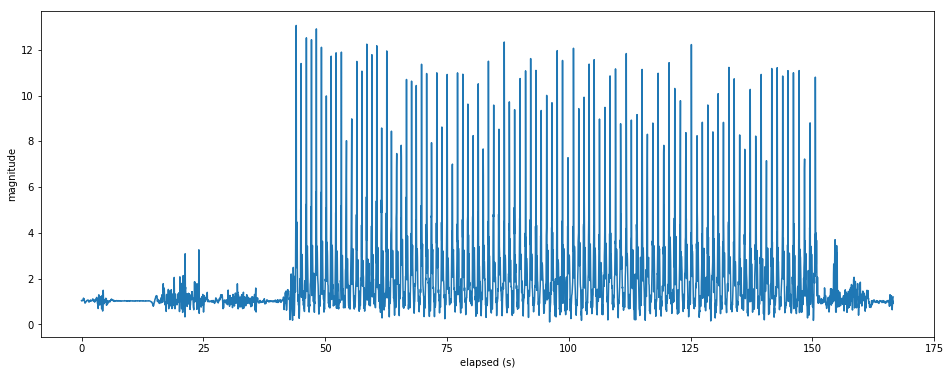

In [53]:
plt.figure(figsize=(16, 6))
sb.lineplot(combined["elapsed (s)"],combined["magnitude"])
# for each in events:
#     plt.axvline(each,color="r")

In [56]:
event_index

[1098,
 1123,
 1150,
 1176,
 1201,
 1227,
 1252,
 1277,
 1302,
 1329,
 1355,
 1382,
 1408,
 1434,
 1459,
 1485,
 1510,
 1535,
 1561,
 1585,
 1612,
 1635,
 1636,
 1662,
 1688,
 1712,
 1739,
 1765,
 1790,
 1817,
 1843,
 1870,
 1923,
 1950,
 1976,
 2003,
 2029,
 2054,
 2081,
 2108,
 2135,
 2136,
 2162,
 2188,
 2215,
 2243,
 2271,
 2297,
 2324,
 2351,
 2379,
 2406,
 2433,
 2460,
 2488,
 2516,
 2543,
 2570,
 2596,
 2622,
 2649,
 2677,
 2703,
 2731,
 2757,
 2786,
 2812,
 2841,
 2867,
 2894,
 2922,
 2949,
 2977,
 2978,
 3005,
 3034,
 3063,
 3091,
 3119,
 3148,
 3175,
 3203,
 3229,
 3256,
 3283,
 3311,
 3338,
 3366,
 3392,
 3420,
 3448,
 3476,
 3530,
 3558,
 3586,
 3613,
 3641,
 3670,
 3726,
 3753]

In [58]:
dummy = combined.iloc[2977-8:2977+8+1]

In [59]:
dummy

,elapsed (s),X-Axis (g),Y-Axis (g),Z-Axis (g),X-Axis (°/s),Y-Axis (°/s),Z-Axis (°/s),magnitude
2969,119.144,0.979,0.589,0.583,-20.244,5.122,7.866,1.282673
2970,119.184,1.188,0.787,0.595,38.293,29.146,-33.354,1.544260
2971,119.225,1.280,0.946,0.557,25.976,37.561,-32.317,1.686287
2972,119.264,1.180,0.795,0.266,-3.902,42.134,6.280,1.447474
2973,119.304,1.369,0.477,-0.029,-30.183,65.671,70.427,1.450011
2974,119.345,2.002,0.713,-0.593,-37.622,94.573,138.415,2.206359
2975,119.384,2.950,0.951,-1.341,40.610,122.988,133.049,3.377156
2976,119.425,2.492,1.080,-1.437,152.073,178.049,65.366,3.072691
2977,119.465,-7.220,-1.769,1.086,217.317,283.415,11.159,7.512467
2978,119.505,-6.918,3.561,0.819,327.988,426.159,74.878,7.823695


In [67]:
known_clean_data(accel,gyro,100,8,category,user)

/Users/matthewhwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyError: "['elapsed (s)'] not found in axis"